# Lightning DataModule

Just double checking that everything works as expected

In [1]:
import os
from pathlib import Path

In [2]:
# change working directory to the root of the project
cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir("..")

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from baseg.datamodules import EMSDataModule


In [4]:
def mask2rgb(image: np.ndarray, palette: dict) -> np.ndarray:
    lut = np.zeros((256, 3), dtype=np.uint8)
    for k, v in palette.items():
        lut[k, :] = v
    return lut[image]

In [5]:
module = EMSDataModule(root=Path("data/ems"), patch_size=512, batch_size_eval=1)
module.setup(stage="fit")

In [11]:
val_loader = module.val_dataloader()
print(len(val_loader))

638


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


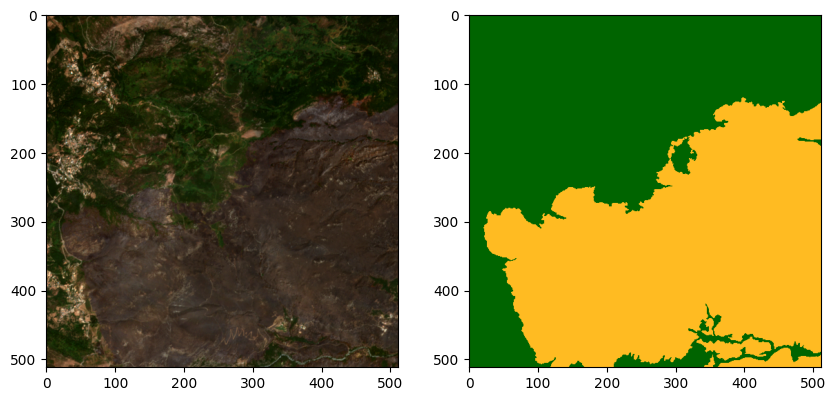

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


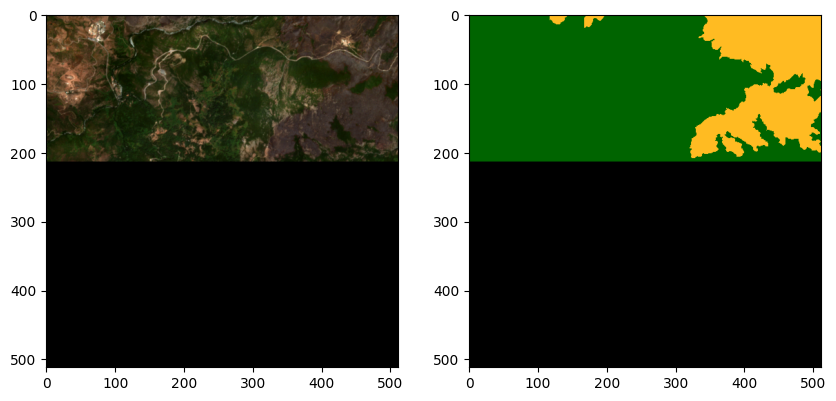

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


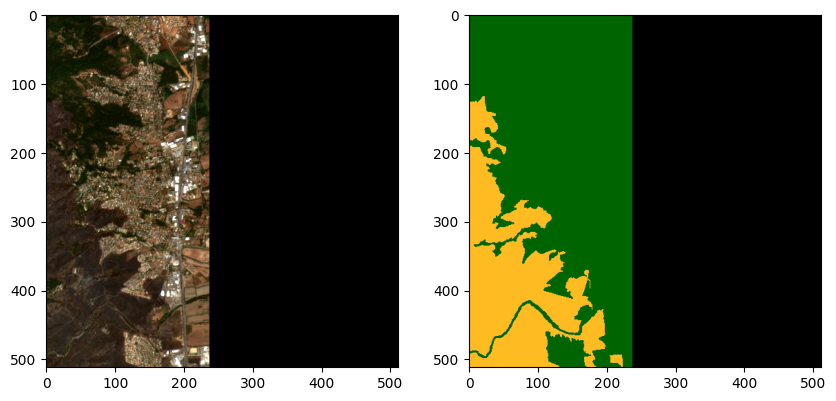

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


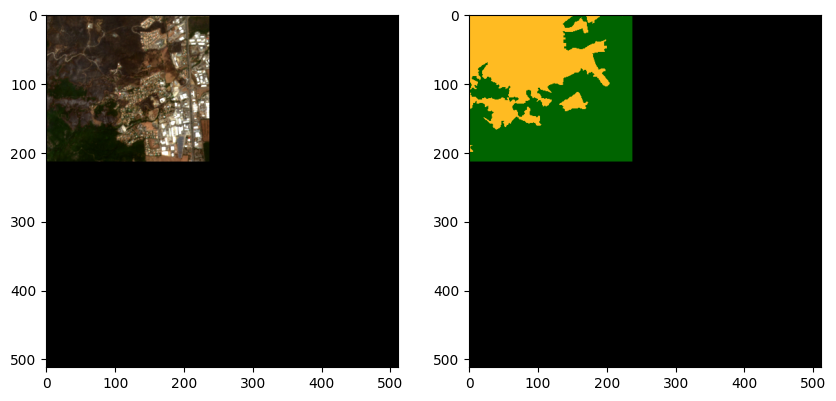

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


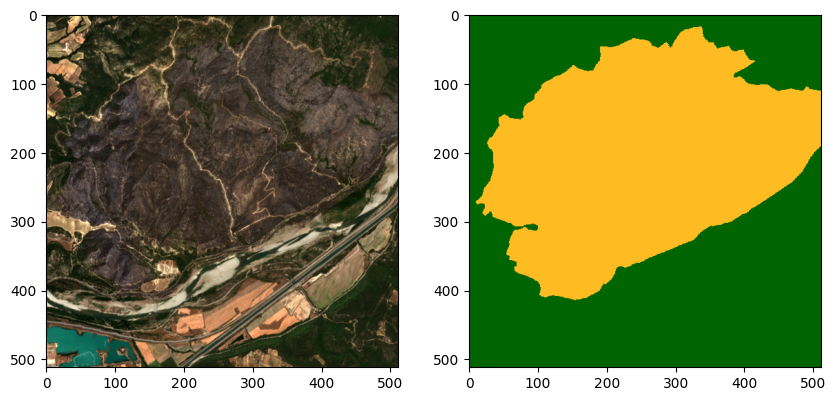

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


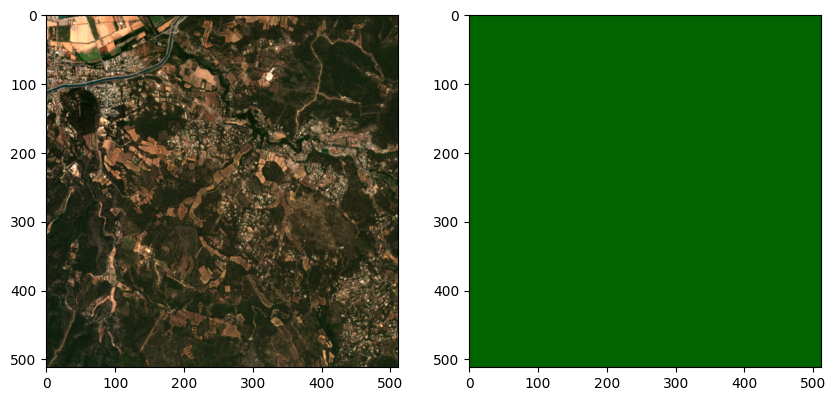

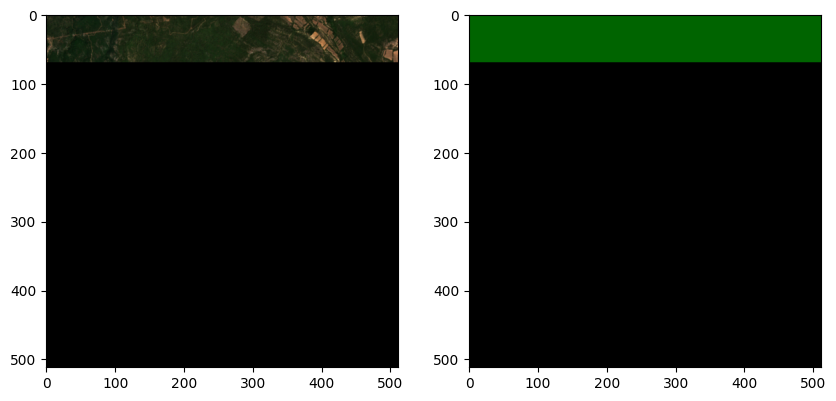

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


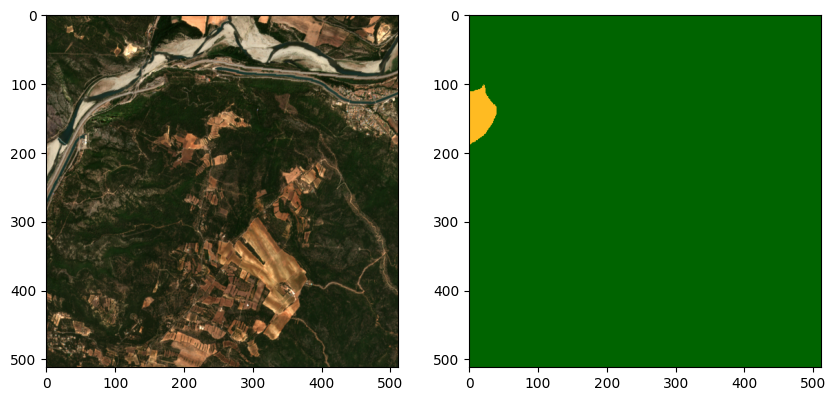

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


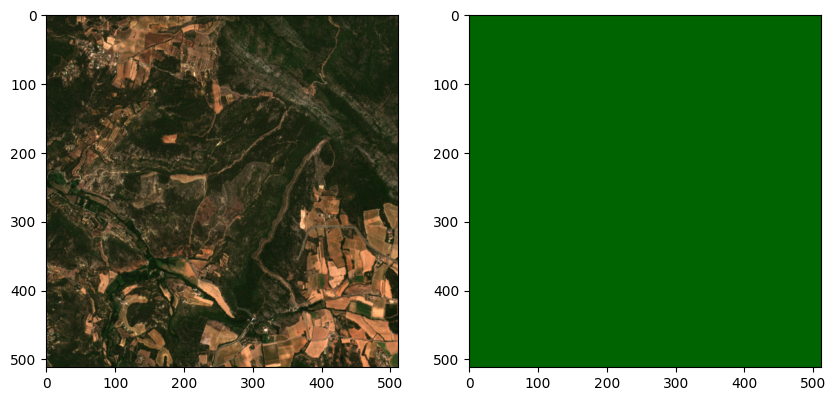

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


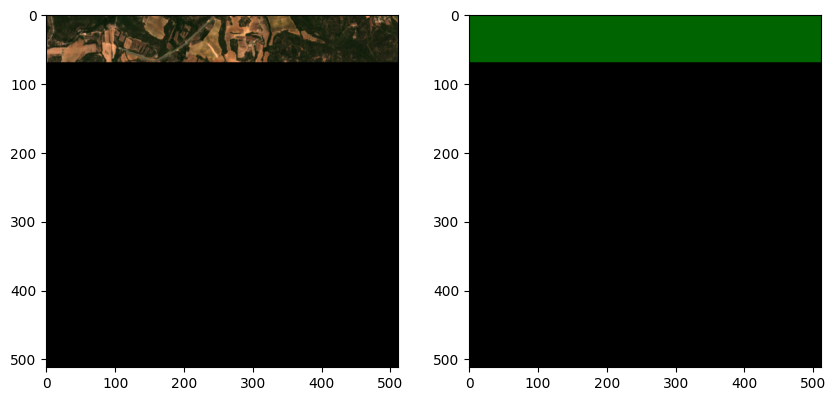

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


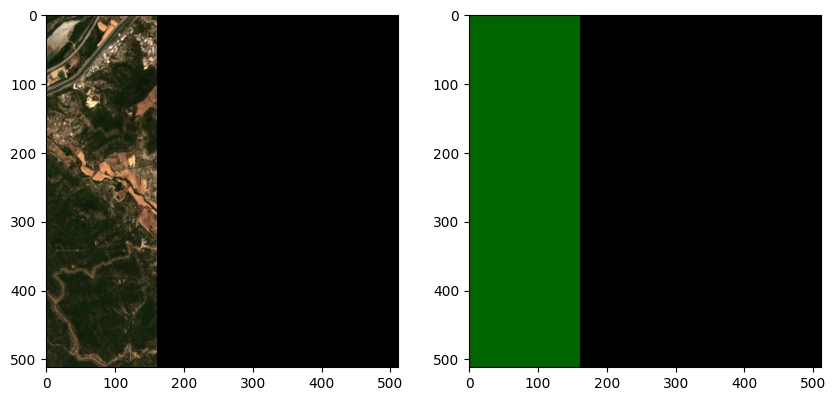

In [12]:
# plot a few images
count = 0
for batch in val_loader:
    if count > 10:
        break
    image = batch["S2L2A"].squeeze().numpy()[[3,2,1]] * 3
    mask = batch["DEL"].squeeze().numpy()
    image = np.moveaxis(image, 0, -1)
    mask = mask2rgb(mask, module.val_set.palette)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[1].imshow(mask)
    plt.show()
    count += 1